In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
DATA_PATH="/content/drive/MyDrive/100_days_100_project/Disease Prediction Using Machine Learning/Dataset/Training.csv"

In [3]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline


In [4]:
data = pd.read_csv(DATA_PATH).dropna(axis = 1)

In [5]:
data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [6]:
# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()

temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

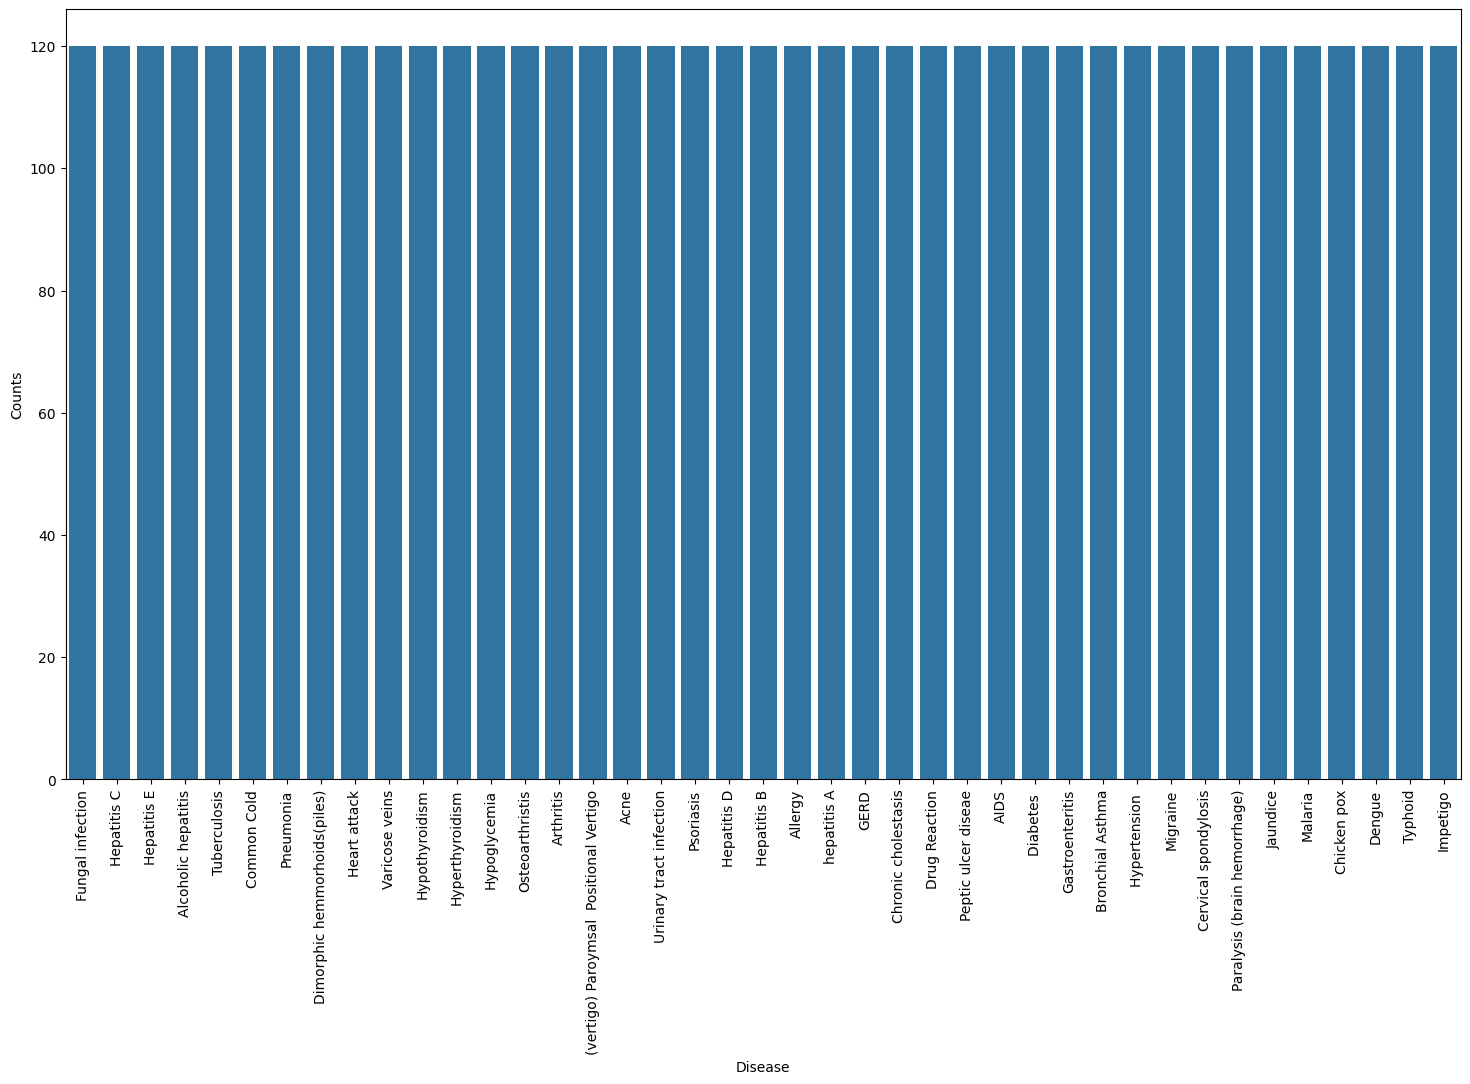

In [7]:
plt.figure(figsize = (18,10))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [8]:
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

In [9]:
x = data.iloc[:, :-1]
y = data.iloc[:,-1]

In [10]:
X_train,X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 24)

In [11]:
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [12]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, x, y):
  return accuracy_score(y, estimator.predict(x))

#Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=18)
}

  # Producing cross validation score for the models

for model_name in models:
  model = models[model_name]
  scores = cross_val_score(model, x, y, cv=10,n_jobs=  -1, scoring=cv_scoring)
  print("=="*30)
  print(model_name)
  print(f"Scores: {scores}")
  print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data by SVM Classifier : 100.0
Accuracy on test data by SVM classifier : 100.0


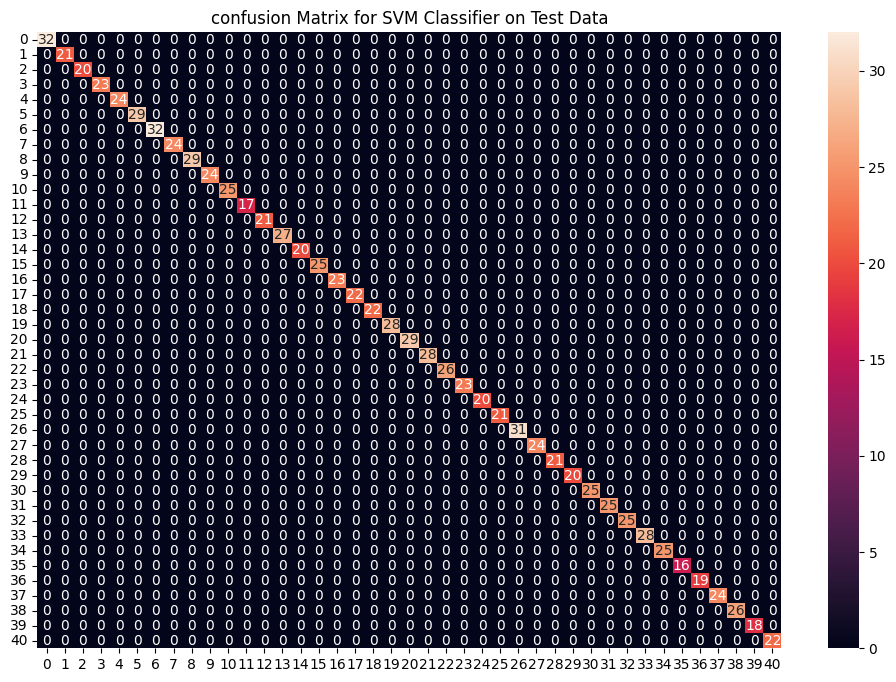

In [13]:
svm_model = SVC()
svm_model.fit(X_train,y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier : {accuracy_score(y_train,svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM classifier : {accuracy_score(y_test,preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("confusion Matrix for SVM Classifier on Test Data")
plt.show()

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


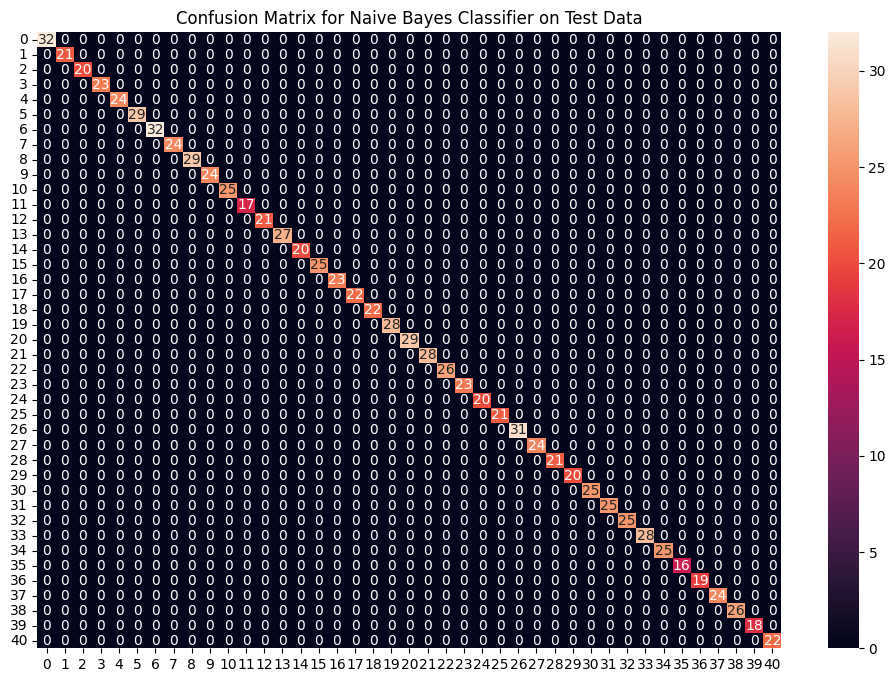

In [14]:
# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

Accuracy on train data by Random Forest Classifier : 100.0
Accuracy on test data by Random Forest Classifier : 100.0


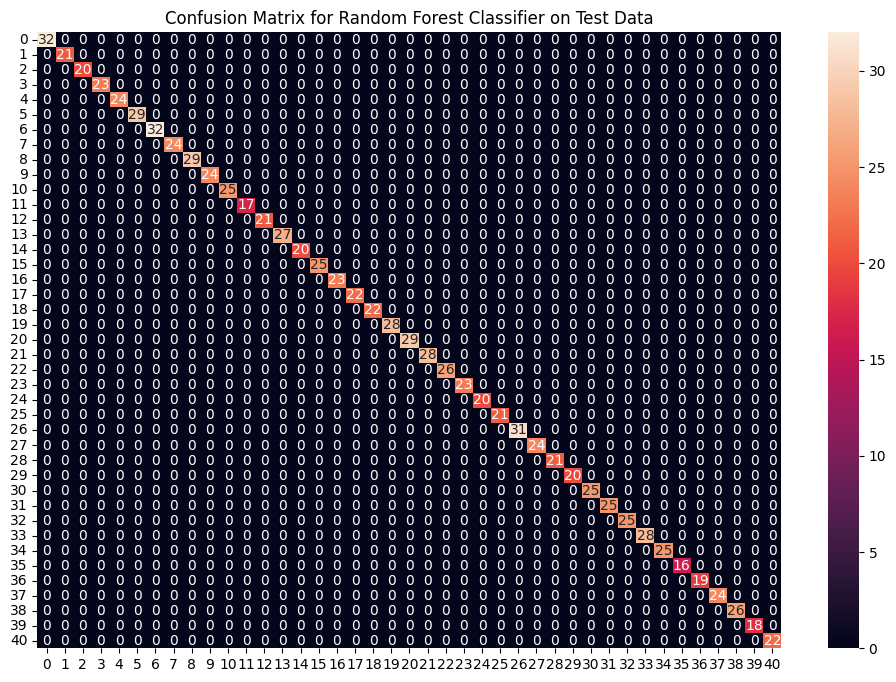

In [15]:
# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier : {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier : {accuracy_score(y_test, preds)*100}")


cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

In [16]:
#Creating a function that can take symptoms as input and generate predictions for disease

In [19]:

symptoms = x.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

In [28]:
data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

In [45]:
data_dict

{'symptom_index': {'Itching': 0,
  'Skin Rash': 1,
  'Nodal Skin Eruptions': 2,
  'Continuous Sneezing': 3,
  'Shivering': 4,
  'Chills': 5,
  'Joint Pain': 6,
  'Stomach Pain': 7,
  'Acidity': 8,
  'Ulcers On Tongue': 9,
  'Muscle Wasting': 10,
  'Vomiting': 11,
  'Burning Micturition': 12,
  'Spotting  urination': 13,
  'Fatigue': 14,
  'Weight Gain': 15,
  'Anxiety': 16,
  'Cold Hands And Feets': 17,
  'Mood Swings': 18,
  'Weight Loss': 19,
  'Restlessness': 20,
  'Lethargy': 21,
  'Patches In Throat': 22,
  'Irregular Sugar Level': 23,
  'Cough': 24,
  'High Fever': 25,
  'Sunken Eyes': 26,
  'Breathlessness': 27,
  'Sweating': 28,
  'Dehydration': 29,
  'Indigestion': 30,
  'Headache': 31,
  'Yellowish Skin': 32,
  'Dark Urine': 33,
  'Nausea': 34,
  'Loss Of Appetite': 35,
  'Pain Behind The Eyes': 36,
  'Back Pain': 37,
  'Constipation': 38,
  'Abdominal Pain': 39,
  'Diarrhoea': 40,
  'Mild Fever': 41,
  'Yellow Urine': 42,
  'Yellowing Of Eyes': 43,
  'Acute Liver Failure': 4

In [61]:
def predictDisease(symptoms):
    symptoms = symptoms.split(",")

    # creating input data for the models
    #initializing zeroes of length of data_dict["symptom_index"]
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1

    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)

    input_df = pd.DataFrame([input_data][0], columns=x.columns)

    # generating individual outputs
    rf_prediction = [rf_model.predict(input_df)[0]]
    nb_prediction = [nb_model.predict(input_df)[0]]
    svm_prediction = [svm_model.predict(input_df)[0]]

    # making final prediction by taking mode of all predictions
    final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
    predictions = {
        "rf_model_prediction": data_dict["predictions_classes"][rf_prediction][0],
        "naive_bayes_prediction": data_dict["predictions_classes"][nb_prediction][0],
        "svm_model_prediction": data_dict["predictions_classes"][svm_prediction][0],
        "final_prediction":data_dict["predictions_classes"][final_prediction]
    }
    return predictions

# Testing the function
predictDisease("Itching,Skin Rash,Nodal Skin Eruptions")

{'rf_model_prediction': 'Fungal infection',
 'naive_bayes_prediction': 'Fungal infection',
 'svm_model_prediction': 'Fungal infection',
 'final_prediction': 'Fungal infection'}